# L1, L2 Regularization 실습

이번 실습에서는 **L1, L2 Regularization** 이 Overfitting 완화에 어떻게 도움이 되는지 체감해봅니다.

- 작은 데이터셋과 복잡한 모델로 Overfitting 유도
- Regularization 유무 비교 (L1, L2, L1+L2)
- Validation Loss/Accuracy 곡선으로 비교

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 준비 (작은 데이터셋 → Overfitting 유도)

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 모델 생성 함수 (Regularization 적용 가능)

In [3]:
def build_model(regularizer=None):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizer)
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 3. Regularization 설정 및 모델 학습

In [4]:
models = {
    "No Regularization": build_model(),
    "L1 (0.001)": build_model(tf.keras.regularizers.l1(0.001)),
    "L2 (0.001)": build_model(tf.keras.regularizers.l2(0.001)),
    "L1+L2 (0.001)": build_model(tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001))
}

histories = {}

for name, model in models.items():
    print(f"Training: {name}")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200,
        batch_size=16,
        verbose=0
    )
    histories[name] = history

Training: No Regularization
Training: L1 (0.001)
Training: L2 (0.001)
Training: L1+L2 (0.001)


## 4. 결과 시각화 (Loss & Accuracy)

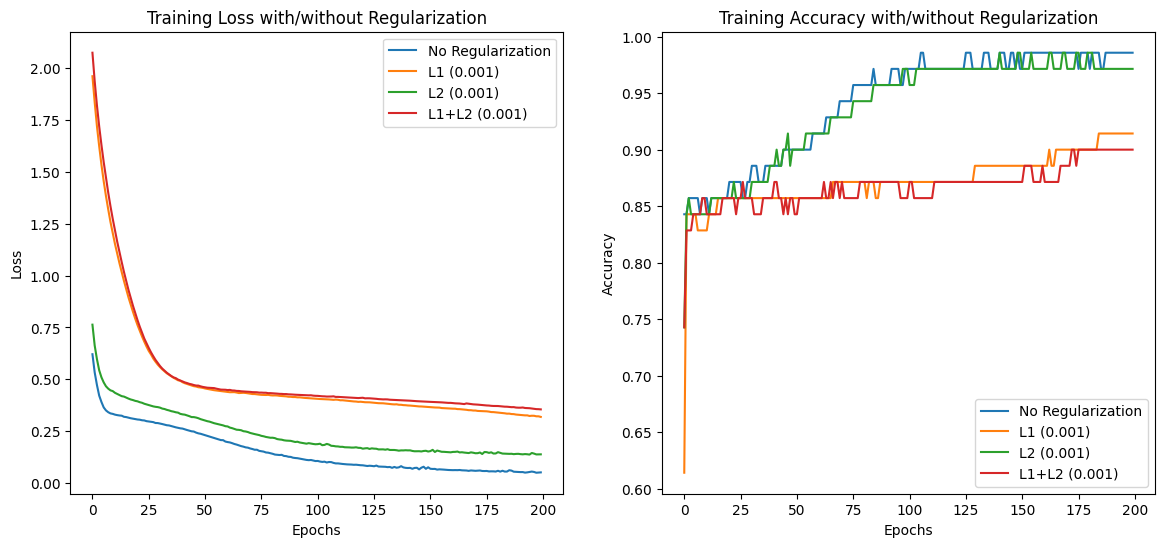

In [5]:
plt.figure(figsize=(14,6))

# Loss 비교
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history["loss"], label=f"{name}")
plt.title("Training Loss with/without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history.history["accuracy"], label=f"{name}")
plt.title("Training Accuracy with/without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

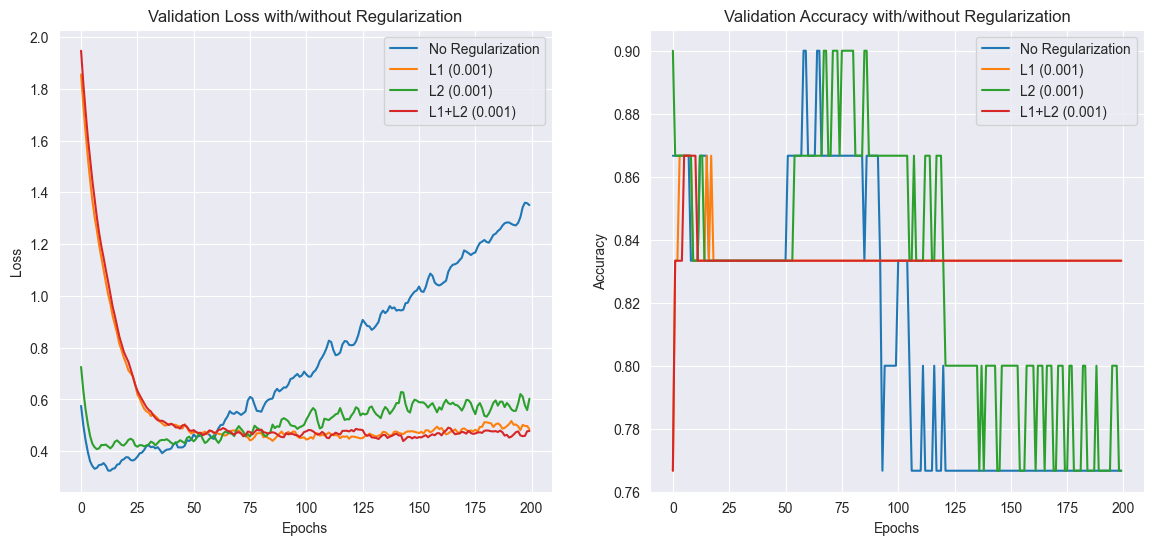

In [31]:
plt.figure(figsize=(14,6))

# Loss 비교
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history["val_loss"], label=f"{name}")
plt.title("Validation Loss with/without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy 비교
plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=f"{name}")
plt.title("Validation Accuracy with/without Regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()